# *Importing required libraries*

In [ ]:
import numpy as np
import random
import math
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import itertools
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict
import operator

# *Importing dataset*

In [ ]:
if(not os.path.exists("twitter_combined.txt.gz")):
  !wget https://snap.stanford.edu/data/twitter_combined.txt.gz
if(not os.path.exists("com-youtube.ungraph.txt.gz")):
  !wget http://snap.stanford.edu/data/bigdata/communities/com-youtube.ungraph.txt.gz

if(not os.path.exists("twitter_combined.txt")):
  !gunzip twitter_combined.txt
if(not os.path.exists("com-youtube.ungraph.txt")):
  !gunzip com-youtube.ungraph.txt    


--2021-05-12 15:17:43--  https://snap.stanford.edu/data/twitter_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10621918 (10M) [application/x-gzip]
Saving to: ‘twitter_combined.txt.gz’

twitter_combined.tx 100%[===================>]  10.13M  1.54MB/s    in 6.6s    

2021-05-12 15:17:50 (1.53 MB/s) - ‘twitter_combined.txt.gz’ saved [10621918/10621918]

--2021-05-12 15:17:51--  http://snap.stanford.edu/data/bigdata/communities/com-youtube.ungraph.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10590328 (10M) [application/x-gzip]
Saving to: ‘com-youtube.ungraph.txt.gz’

com-youtube.ungraph 100%[===================>]  10.10M  4.03MB/s    in 2.5s    

2021-05-12 15

# *SETUP FOR GIANT COMPONENT*

In [ ]:
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and pydot not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout

# *YOUTUBE Dataset*

In [ ]:
G=nx.DiGraph()

edges = list()

lines  = open('com-youtube.ungraph.txt', 'r').readlines()
for line in lines:
  if(line[0] != '#'):
    edges.append((int(line.split()[0]),int(line.split()[1])))

G.add_edges_from(edges[:100])

G = G.to_undirected()

# *Youtube GIANT COMPONENT*

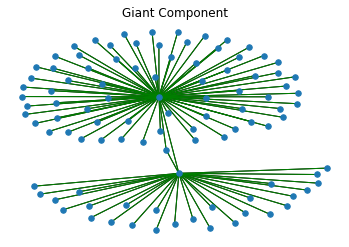

In [ ]:
plt.title("Giant Component")

nx.draw(G, layout(G), with_labels=False ,node_size=30)

Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
nx.draw_networkx_edges(G0, layout(G), edge_color='g',width=1.0)

for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(G.subgraph(Gi), layout(G),edge_color='r',alpha=0.5,width=4.0)



# *Ng/N for Youtube*

In [ ]:
N = G.number_of_nodes()
Ng = len(Gcc[0])

print("Number of Nodes in Graph(used for depicting this giant component) is : ", N)
print("Number of Nodes in Giant Component of this Graph is : ",Ng)

print("Ng/N ratio for Graph from Dataset 1 is : ", Ng/N)

Number of Nodes in Graph(used for depicting this giant component) is :  100
Number of Nodes in Giant Component of this Graph is :  100
Ng/N ratio for Graph from Dataset 1 is :  1.0


# *TWITTER Dataset*

In [ ]:
G2=nx.DiGraph()

edges = list()

lines  = open('twitter_combined.txt', 'r').readlines()
for line in lines:
  if(line[0] != '#'):
    edges.append((int(line.split()[0]),int(line.split()[1])))

G2.add_edges_from(edges[:100])

G2 = G2.to_undirected()

# *Twitter GIANT  COMPONENT*

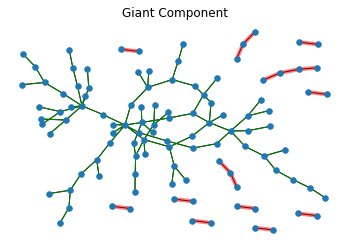

In [ ]:
plt.title("Giant Component")

nx.draw(G2, layout(G2), with_labels=False ,node_size=30)

Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G01 = G2.subgraph(Gcc[0])

nx.draw_networkx_edges(G01, layout(G2), edge_color='g',width=1.0)

for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(G2.subgraph(Gi), layout(G2),edge_color='r',alpha=0.5,width=4.0)

# *Ng/N For Twitter*

In [ ]:
N = G2.number_of_nodes()
Ng = len(Gcc[0])

print("Number of Nodes in Graph(used for depicting this giant component) is : ", N)
print("Number of Nodes in Giant Component of this Graph is : ",Ng)

print("Ng/N ratio for Graph from Dataset 2 is : ", Ng/N)

Number of Nodes in Graph(used for depicting this giant component) is :  108
Number of Nodes in Giant Component of this Graph is :  80
Ng/N ratio for Graph from Dataset 2 is :  0.7407407407407407


## ***Community Detection for Dataset 1 (Youtube )***
# Using Girvan Newman Algorithm
Note: Nodes in different color represents members of different community. Membership of Node in a particular community changes with the number of community entire network is to be divided. This is iterated for 5 times here.

([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258], [2, 40, 106, 107, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193])


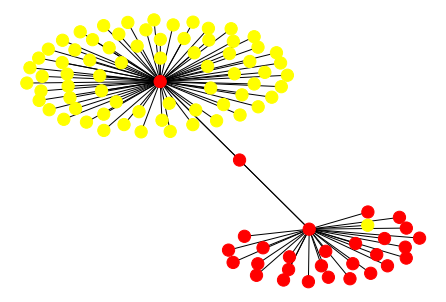

([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258], [2, 106, 107, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193], [40])


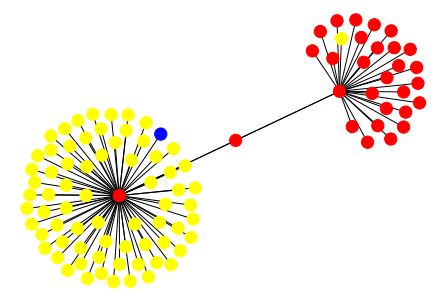

([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258], [2, 107, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193], [40], [106])


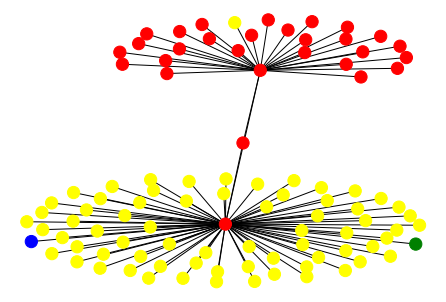

([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258], [2, 126, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193], [40], [106], [107])


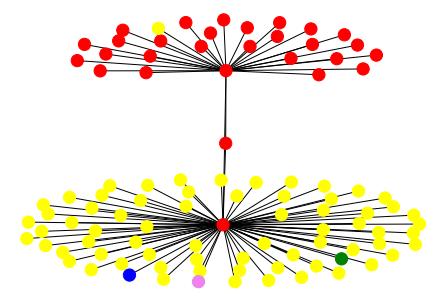

([1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 376, 1219, 268635, 317880, 665255, 665256, 665257, 665258], [2, 134, 242, 247, 276, 291, 341, 363, 365, 367, 404, 446, 455, 480, 495, 514, 534, 688, 718, 723, 730, 762, 776, 797, 803, 839, 840, 847, 848, 851, 881, 882, 903, 940, 967, 1009, 1013, 1070, 1085, 1180, 1183, 1225, 1227, 1244, 1258, 1270, 1708, 1795, 1870, 1999, 2059, 2235, 2243, 2246, 2254, 2266, 2661, 2723, 2775, 2844, 2892, 2974, 3100, 3102, 3120, 3173, 3193], [40], [106], [107], [126])


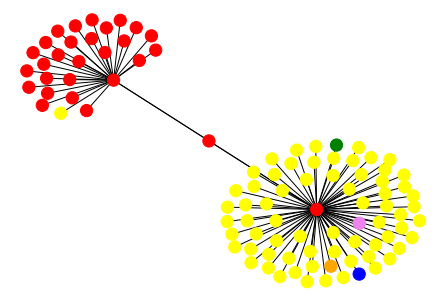

In [ ]:
from networkx import community
com = community.girvan_newman(G)
n = 5
for communities in itertools.islice(com, n):
  print(tuple(sorted(c) for c in communities))
  node_groups = []
  node_groups.append(tuple(sorted(c) for c in communities))
  color_map = []
  k = -1
  for c in communities:
    k = k+1
    col = ['red','yellow','blue', 'green','violet','orange','indigo','magenta','pink','purple',
           'white','grey','brown','maroon','red','yellow','blue', 'green','violet','orange',
           'indigo','magenta','pink','purple','white','grey','brown','maroon']
    for i in c:
      color_map.append(col[k])
  nx.draw(G, node_color=color_map, with_labels=False,node_size=150)
  plt.show()

# *Step By Step Iteration (till 5 steps)*

# *Iteration 1*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G))
print(max_b1)

(2, 3193)


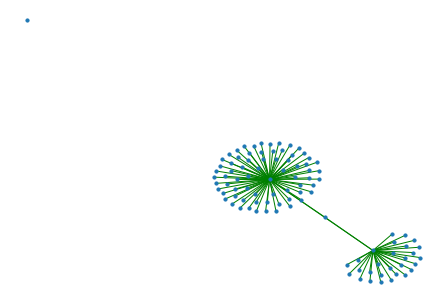

In [ ]:
#Step2 :Remove the edge from network
G.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G,pos=None,edge_color="g",node_size=10)

# *Iteration 2*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G))
print(max_b1)

(2, 3173)


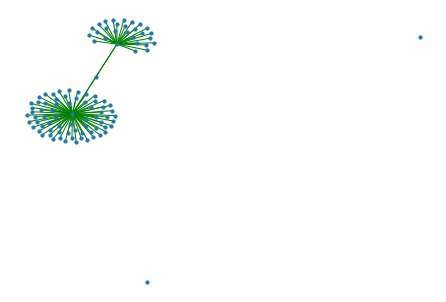

In [ ]:
#Step2 :Remove the edge from network
G.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G,pos=None,edge_color="g",node_size=10)

# *Iteration 3*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G))
print(max_b1)

(2, 3120)


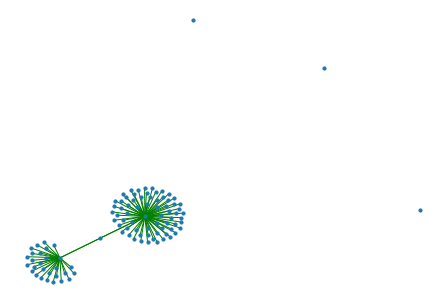

In [ ]:
#Step2 :Remove the edge from network
G.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G,pos=None,edge_color="g",node_size=10)

# *Iteration 4*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G))
print(max_b1)

(2, 3102)


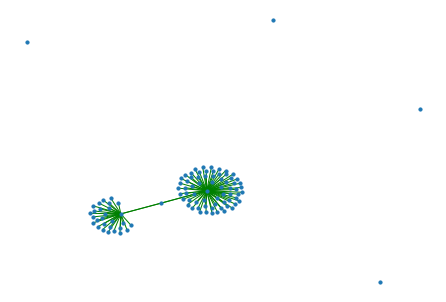

In [ ]:
#Step2 :Remove the edge from network
G.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G,pos=None,edge_color="g",node_size=10)

# *Iteration 5*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G))
print(max_b1)

(2, 3100)


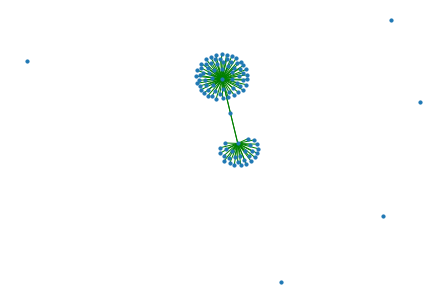

In [ ]:
#Step2 :Remove the edge from network
G.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G,pos=None,edge_color="g",node_size=10)

## ***Community Detection for Dataset 2 (Twitter )***
# Using Girvan Newman Algorithm
Note: Nodes in different color represents members of different community. Membership of Node in a particular community changes with the number of community entire network is to be divided. This is iterated for 5 times here.

([6581292, 8088112, 14925700, 15023872, 17434613, 17675120, 17759158, 17868918, 19493072, 19705747, 26929220, 27633075, 31331740, 31414569, 34428380, 35148062, 35415466, 37699718, 43003845, 67864340, 69592091, 72818790, 83943787, 88323281, 100581193, 103598216, 107830991, 113058991, 123371682, 124528830, 131613362, 151338729, 155661154, 157829215, 158419434, 172883064, 196327549, 200559228, 206923844, 214328887, 220068522, 222261763, 225444667, 254839786, 258140947, 274153775, 276308596, 279787626, 280935165, 285312927, 307458983, 314316607, 358775055, 394263193, 400689940, 430313102, 437804658, 451250774, 460282402, 461410856], [17116707, 18996905, 19933035, 21548772, 28465635, 56860418, 88097807, 134940306, 149538028, 153226312, 160237722, 187773078, 195475105, 204317520, 231238695, 248883350, 276577539, 364971269, 380580781, 430268163], [22462180, 107511013, 153460275, 221036078], [262802533, 406628822], [270449528, 297801196], [54228724, 220368467], [21146135, 207594668], [40981798

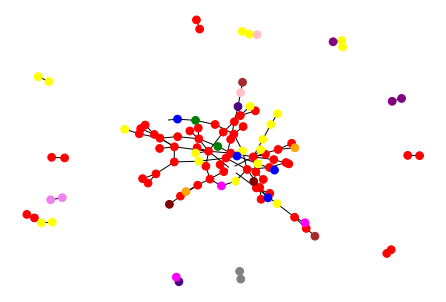

([6581292, 8088112, 15023872, 19493072, 19705747, 26929220, 27633075, 31331740, 34428380, 35148062, 35415466, 37699718, 43003845, 67864340, 69592091, 72818790, 83943787, 88323281, 103598216, 113058991, 124528830, 131613362, 151338729, 155661154, 172883064, 196327549, 200559228, 206923844, 214328887, 220068522, 222261763, 225444667, 254839786, 258140947, 274153775, 276308596, 279787626, 285312927, 307458983, 314316607, 430313102, 451250774, 460282402], [17116707, 18996905, 19933035, 21548772, 28465635, 56860418, 88097807, 134940306, 149538028, 153226312, 160237722, 187773078, 195475105, 204317520, 231238695, 248883350, 276577539, 364971269, 380580781, 430268163], [22462180, 107511013, 153460275, 221036078], [14925700, 17434613, 17675120, 17759158, 17868918, 31414569, 100581193, 107830991, 123371682, 157829215, 158419434, 280935165, 358775055, 394263193, 400689940, 437804658, 461410856], [262802533, 406628822], [270449528, 297801196], [54228724, 220368467], [21146135, 207594668], [409817

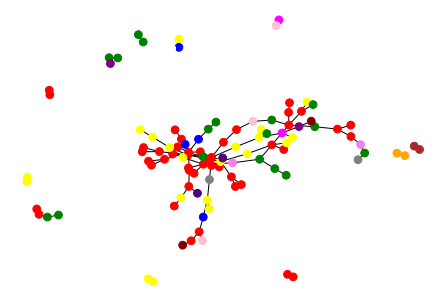

([8088112, 19493072, 19705747, 27633075, 31331740, 34428380, 35415466, 37699718, 67864340, 72818790, 88323281, 124528830, 131613362, 172883064, 200559228, 214328887, 222261763, 254839786, 258140947, 274153775, 279787626, 307458983, 460282402], [17116707, 18996905, 19933035, 21548772, 28465635, 56860418, 88097807, 134940306, 149538028, 153226312, 160237722, 187773078, 195475105, 204317520, 231238695, 248883350, 276577539, 364971269, 380580781, 430268163], [22462180, 107511013, 153460275, 221036078], [14925700, 17434613, 17675120, 17759158, 17868918, 31414569, 100581193, 107830991, 123371682, 157829215, 158419434, 280935165, 358775055, 394263193, 400689940, 437804658, 461410856], [6581292, 15023872, 26929220, 35148062, 43003845, 69592091, 83943787, 103598216, 113058991, 151338729, 155661154, 196327549, 206923844, 220068522, 225444667, 276308596, 285312927, 314316607, 430313102, 451250774], [262802533, 406628822], [270449528, 297801196], [54228724, 220368467], [21146135, 207594668], [4098

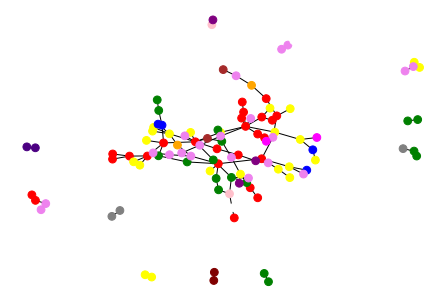

([8088112, 19493072, 19705747, 27633075, 31331740, 34428380, 35415466, 37699718, 67864340, 72818790, 88323281, 124528830, 131613362, 172883064, 200559228, 214328887, 222261763, 254839786, 258140947, 274153775, 279787626, 307458983, 460282402], [17116707, 18996905, 19933035, 21548772, 28465635, 56860418, 88097807, 134940306, 149538028, 153226312, 160237722, 187773078, 195475105, 204317520, 231238695, 248883350, 276577539, 364971269, 380580781, 430268163], [22462180, 107511013, 153460275, 221036078], [14925700, 17434613, 17675120, 17759158, 17868918, 31414569, 100581193, 107830991, 123371682, 157829215, 158419434, 280935165, 358775055, 394263193, 400689940, 437804658, 461410856], [15023872, 26929220, 69592091, 83943787, 113058991, 151338729, 155661154, 196327549, 225444667, 276308596, 285312927], [262802533, 406628822], [270449528, 297801196], [54228724, 220368467], [6581292, 35148062, 43003845, 103598216, 206923844, 220068522, 314316607, 430313102, 451250774], [21146135, 207594668], [40

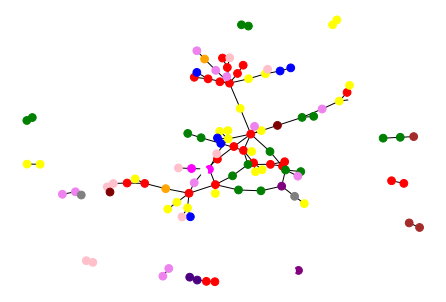

([19493072, 19705747, 31331740, 34428380, 37699718, 72818790, 131613362, 200559228, 214328887, 258140947, 279787626], [17116707, 18996905, 19933035, 21548772, 28465635, 56860418, 88097807, 134940306, 149538028, 153226312, 160237722, 187773078, 195475105, 204317520, 231238695, 248883350, 276577539, 364971269, 380580781, 430268163], [22462180, 107511013, 153460275, 221036078], [14925700, 17434613, 17675120, 17759158, 17868918, 31414569, 100581193, 107830991, 123371682, 157829215, 158419434, 280935165, 358775055, 394263193, 400689940, 437804658, 461410856], [15023872, 26929220, 69592091, 83943787, 113058991, 151338729, 155661154, 196327549, 225444667, 276308596, 285312927], [8088112, 27633075, 35415466, 67864340, 88323281, 124528830, 172883064, 222261763, 254839786, 274153775, 307458983, 460282402], [262802533, 406628822], [270449528, 297801196], [54228724, 220368467], [6581292, 35148062, 43003845, 103598216, 206923844, 220068522, 314316607, 430313102, 451250774], [21146135, 207594668], [

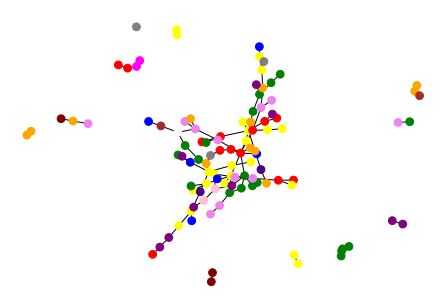

In [ ]:
from networkx import community
com = community.girvan_newman(G2)
n = 5
for communities in itertools.islice(com, n):
  print(tuple(sorted(c) for c in communities))
  node_groups = []
  node_groups.append(tuple(sorted(c) for c in communities))
  color_map = []
  k = -1
  for c in communities:
    k = k+1
    col = ['red','yellow','blue', 'green','violet','orange','indigo','magenta','pink','purple',
           'white','grey','brown','maroon','red','yellow','blue', 'green','violet','orange',
           'indigo','magenta','pink','purple','white','grey','brown','maroon']
    for i in c:
      color_map.append(col[k])
  nx.draw(G2, node_color=color_map, with_labels=False,node_size=60)
  plt.show()

# *Step By Step Iteration (till 5 steps)*

# *Iteration 1*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G2))
print(max_b1)

(461410856, 31414569)


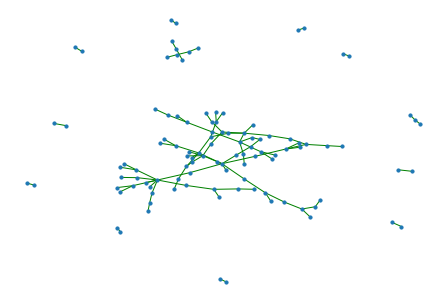

In [ ]:
#Step2 :Remove the edge from network
G2.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G2,pos=None,edge_color="g",node_size=10)

# *Iteration 2*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G2))
print(max_b1)

(461410856, 17759158)


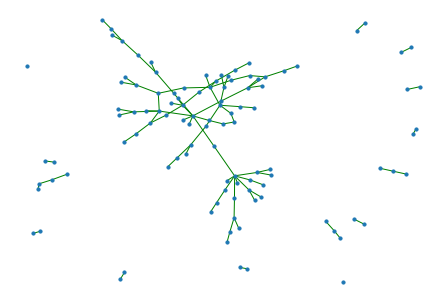

In [ ]:
#Step2 :Remove the edge from network
G2.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G2,pos=None,edge_color="g",node_size=10)

# *Iteration 3*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G2))
print(max_b1)

(451250774, 314316607)


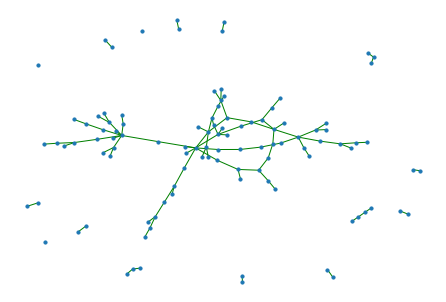

In [ ]:
#Step2 :Remove the edge from network
G2.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G2,pos=None,edge_color="g",node_size=10)

# *Iteration 4*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G2))
print(max_b1)

(413275344, 259842341)


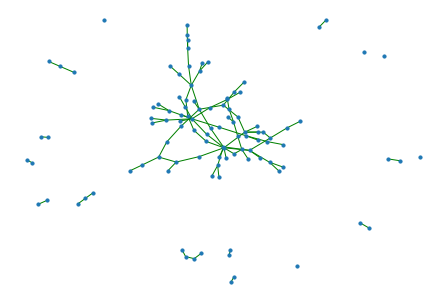

In [ ]:
#Step2 :Remove the edge from network
G2.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G2,pos=None,edge_color="g",node_size=10)

# *Iteration 5*

In [ ]:
#Step1: Finding edge having highest betweeness centrality
max_b1=max(nx.edge_betweenness_centrality(G2))
print(max_b1)

(406628822, 262802533)


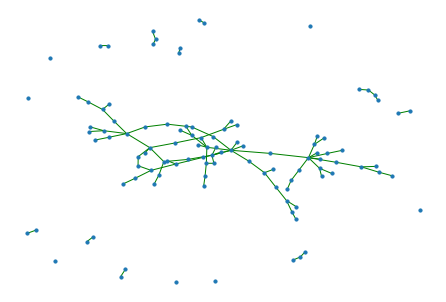

In [ ]:
#Step2 :Remove the edge from network
G2.remove_edge(*max_b1)
#Step 3: Visualise the network
nx.draw(G2,pos=None,edge_color="g",node_size=10)

# *Setup for  Ravasaz Algoritm*

In [ ]:
def create_hc(G, t):
    ## Set-up the distance matrix D
    labels=list(G.nodes())    # keep node labels
    path_length=[n for n in nx.all_pairs_shortest_path_length(G)]
    distances=np.zeros((len(G),len(G)))
    a=list(G.nodes())   
    for u,p in path_length:
        for v,d in p.items():
            distances[a.index(u)][a.index(v)] = d
            distances[a.index(v)][a.index(u)] = d
            if u==v:
                distances[a.index(u)][a.index(u)]=0

    # Create hierarchical cluster (HC)
    # There are various other routines for agglomerative clustering, 
    # but here we create the HCs using the complete/max/farthest point linkage 
    Y = distance.squareform(distances) ## the upper triangular of the distance matrix 
    Z = hierarchy.average(Y)
    
    # This partition selection (t) is arbitrary, for illustrive purposes
    membership=list(hierarchy.fcluster(Z,t=t))
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n,p in zip(list(range(len(G))),membership):
        partition[p].append(labels[n])
        
    return Z, membership, partition

## ***Community Detection for Dataset 1 (Youtube )***
# Using Ravasaz
Note: Nodes in different color represents members of different community. Membership of Node in a particular community changes with the number of community entire network is to be divided.

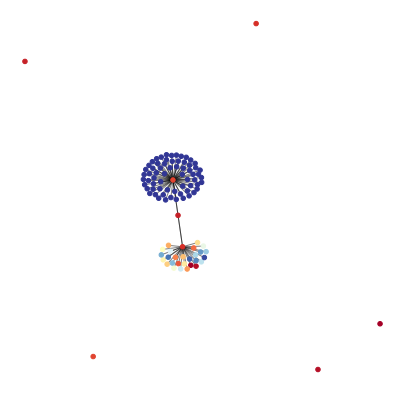

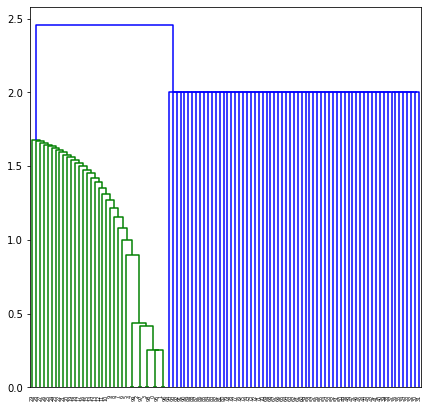

In [ ]:
pos=nx.spring_layout(G)
Z, membership,partition = create_hc(G, t=1.10) 

partition2 = {}
for k in range(len(membership)):
    partition2[k]=membership[k]


plt.figure(figsize=(7,7))
plt.axis('off')     
nx.draw_networkx_nodes(G, pos, cmap=plt.cm.RdYlBu,node_color=list(partition2.values()),node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


plt.figure(figsize=(7,7))
hierarchy.dendrogram(Z)
plt.show()
print('\n')
   

## ***Community Detection for Dataset 2 (Twitter )***
# Using Ravasaz
Note: Nodes in different color represents members of different community. Membership of Node in a particular community changes with the number of community entire network is to be divided.

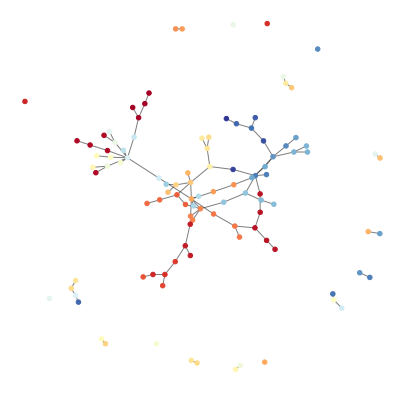

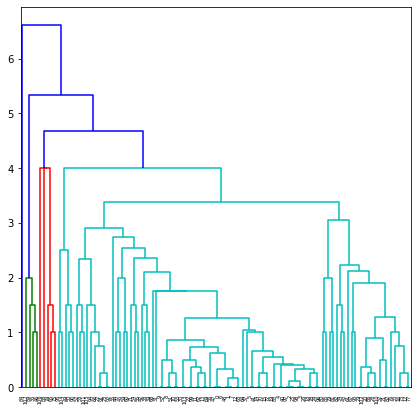

In [ ]:
pos=nx.spring_layout(G2)
Z, membership,partition = create_hc(G2, t=1.10) 

partition2 = {}
for k in range(len(membership)):
    partition2[k]=membership[k]


plt.figure(figsize=(7,7))
plt.axis('off')     
nx.draw_networkx_nodes(G2, pos, cmap=plt.cm.RdYlBu,node_color=list(partition2.values()),node_size=20)
nx.draw_networkx_edges(G2, pos, alpha=0.5)
plt.show()


plt.figure(figsize=(7,7))
hierarchy.dendrogram(Z)
plt.show()
print('\n')
   